In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/home/cheind@profactor.local/dev/torch-instant-ngp/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def sample_np(ts,w,n):

    def inv_cdf(x, y):
        cdf_y = np.cumsum(y)            
        cdf_y = cdf_y/cdf_y.max()
        return lambda t: np.interp(t, cdf_y, x)

    u = np.random.rand(n)
    s = inv_cdf(ts, w)(u)
    return s

#fig, ax = plt.subplots()
#ax.hist(s,bins=20,density=True,range=(ts.min().item(),ts.max().item()));
#ax.plot(ts, w, color='r')

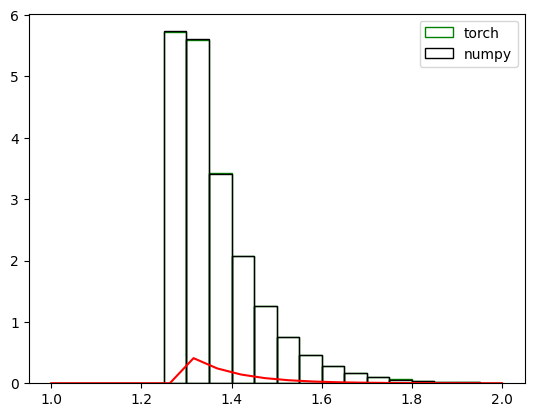

In [5]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from torchngp.functional.z_sampling import sample_ray_step_informed

data = torch.load("invsampledata.pth")
ts, w, tnear, tfar = (
    data["linspace_t"].view(-1),
    data["linspace_weights"].view(-1),
    data["tnear"].item(),
    data["tfar"].item(),
)

N = int(1e6)
s_numpy = sample_np(ts, w, n=N)
s_torch = sample_ray_step_informed(
    ts.view(-1,1,1), 
    tnear=torch.tensor(tnear).view(1,1), 
    tfar=torch.tensor(tfar).view(1,1), 
    weights=w.view(-1,1,1), 
    n_samples=int(N))

fig, ax = plt.subplots()
ax.hist(s_torch.view(-1).numpy(),
    bins=20,
    density=True,
    range=(ts.min().item(),ts.max().item()),
    edgecolor='g', 
    fc=(0, 0, 0, 0.0), 
    label='torch')
ax.hist(s_numpy,
    bins=20,
    density=True,
    range=(ts.min().item(),ts.max().item()),
    edgecolor='k', 
    fc=(0, 0, 0, 0.0), 
    label='numpy');
ax.plot(ts, w, color='r')
ax.legend()

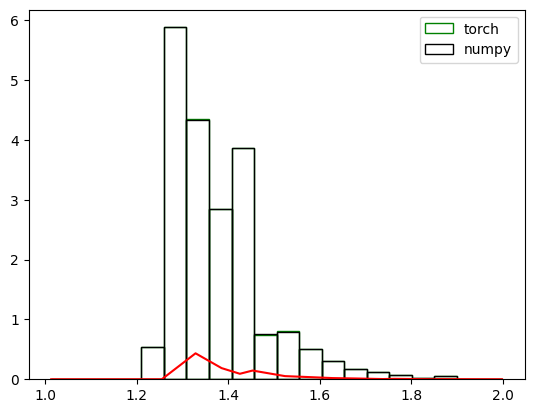

In [8]:
# As above but using the stratified samples


data = torch.load("invsampledata.pth")
ts, w, tnear, tfar = (
    data["stratified_t"].view(-1),
    data["stratified_weights"].view(-1),
    data["tnear"].item(),
    data["tfar"].item(),
)

N = int(1e6)
s_numpy = sample_np(ts, w, n=N)
s_torch = sample_ray_step_informed(
    ts.view(-1,1,1), 
    tnear=torch.tensor(tnear).view(1,1), 
    tfar=torch.tensor(tfar).view(1,1), 
    weights=w.view(-1,1,1), 
    n_samples=int(N))

fig, ax = plt.subplots()
ax.hist(s_torch.view(-1).numpy(),
    bins=20,
    density=True,
    range=(ts.min().item(),ts.max().item()),
    edgecolor='g', 
    fc=(0, 0, 0, 0.0), 
    label='torch')
ax.hist(s_numpy,
    bins=20,
    density=True,
    range=(ts.min().item(),ts.max().item()),
    edgecolor='k', 
    fc=(0, 0, 0, 0.0), 
    label='numpy');
ax.plot(ts, w, color='r')
ax.legend()